In [1]:
# Dependencies
import pandas as pd
%matplotlib notebook 
import matplotlib.pyplot as plt

In [2]:
# Copy CSV
file = "Energy_Usage_2010.csv"

In [3]:
# import CSV
df_energy_2010_data = pd.read_csv("Energy_Usage_2010.csv")
df_energy_2010_data.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


In [4]:
# Extracting Monthly usage data
monthly_series = df_energy_2010_data[["THERM JANUARY 2010","THERM FEBRUARY 2010","THERM MARCH 2010","TERM APRIL 2010","THERM MAY 2010","THERM JUNE 2010","THERM JULY 2010","THERM AUGUST 2010","THERM SEPTEMBER 2010","THERM OCTOBER 2010","THERM NOVEMBER 2010","THERM DECEMBER 2010"]]
monthly_series.head()

,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010
0,2326.0,2131.0,1400.0,620.0,502.0,224.0,222.0,187.0,197.0,252.0,744.0,2112.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1561.0,1388.0,1507.0,701.0,486.0,380.0,18.0,16.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,391.0
4,310.0,268.0,163.0,77.0,57.0,23.0,19.0,8.0,14.0,10.0,NaN,NaN


In [5]:
seasonal_series = df_energy_2010_data[["THERM 1ST QUARTILE 2010","THERM 2ND QUARTILE 2010","THERM 3RD QUARTILE 2010"]]
seasonal_series.head()

,THERM 1ST QUARTILE 2010,THERM 2ND QUARTILE 2010,THERM 3RD QUARTILE 2010
0,1334.0,1864.5,2306.0
1,NaN,NaN,NaN
2,94.0,3028.5,5963.0
3,400.0,400.0,400.0
4,949.0,949.0,949.0


In [6]:
# Removing rows which has no data
monthly_series = monthly_series.dropna(how='all')
monthly_series.head()


,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010
0,2326.0,2131.0,1400.0,620.0,502.0,224.0,222.0,187.0,197.0,252.0,744.0,2112.0
2,1561.0,1388.0,1507.0,701.0,486.0,380.0,18.0,16.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,391.0
4,310.0,268.0,163.0,77.0,57.0,23.0,19.0,8.0,14.0,10.0,NaN,NaN
6,3041.0,2680.0,1151.0,373.0,124.0,26.0,29.0,25.0,49.0,177.0,670.0,3895.0


In [7]:
# New row with sum of all columns:
sum_row = {col: monthly_series[col].sum()/1000000 for col in monthly_series}

# Turn the sums into a DataFrame with one row with an index of 'Total':
sum_df_months = pd.DataFrame(sum_row, index=["Total"])
sum_df_months

,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010
Total,255.424284,216.03629,185.460859,97.734874,63.748827,40.648383,34.964654,33.667858,33.432668,48.198212,95.899143,210.891397


In [8]:
# Renaming columns 
sum_df_months.columns = ['JAN', 'FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

# Transposing table to make each row a month
sum_df_months = sum_df_months.T
sum_df_months

,Total
JAN,255.424284
FEB,216.036290
MAR,185.460859
APR,97.734874
MAY,63.748827
JUN,40.648383
JUL,34.964654
AUG,33.667858
SEP,33.432668
OCT,48.198212


<IPython.core.display.Javascript object>


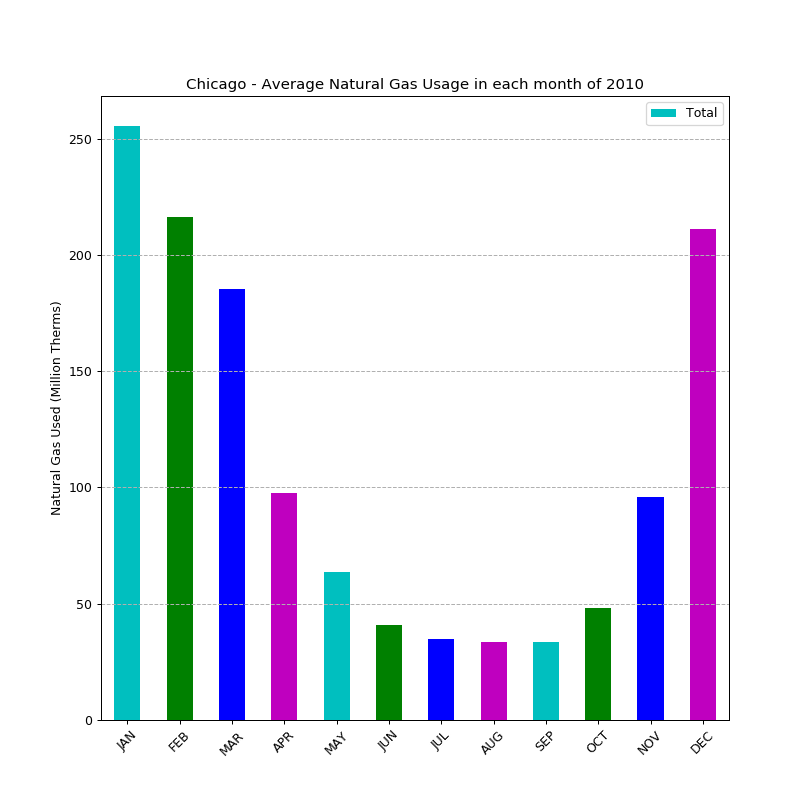

In [9]:
# Plotting the bar chart
title = 'Chicago - Average Natural Gas Usage in each month of 2010'
my_colors = 'cgbm'
sum_df_months.plot(kind='bar',figsize=(9,9),rot=40, title=title,color=my_colors)

# Rotate X-axis label
plt.xticks(rotation=45)

# Add grid lines
plt.gca().yaxis.grid(True, linestyle='--')

# Adjust location of legend
plt.legend(loc='upper right')

# Y-axis label
plt.ylabel('Natural Gas Used (Million Therms)')
plt.tight_layout
plt.savefig("Monthly Usage.png")

plt.show()


In [10]:
# Make a copy of the data frame for seasonal usage
seasonal_usage=sum_df_months.copy()

In [11]:
# Assign season based on Month
def season_name (row):
    month = sum_df_months[sum_df_months['Total'] == row['Total']].index.values[0]
    #print(sum_df_months[sum_df_months['Total'] == row['Total']].index.values[0])
    if ((month == 'NOV') | (month == 'DEC') | (month == 'JAN')) :
        return 'Winter'
    if ((month == 'FEB') | (month == 'MAR') | (month == 'APR')) : 
        return 'Spring'
    if ((month == 'MAY') | (month == 'JUN') | (month == 'JUL')) : 
        return 'Summer'
    if ((month == 'AUG') | (month == 'SEP') | (month == 'OCT')): 
        return 'Autumn'
    return 'Other'

seasonal_usage['Season']=seasonal_usage.apply(lambda row: season_name (row), axis=1)
seasonal_usage

,Total,Season
JAN,255.424284,Winter
FEB,216.036290,Spring
MAR,185.460859,Spring
APR,97.734874,Spring
MAY,63.748827,Summer
JUN,40.648383,Summer
JUL,34.964654,Summer
AUG,33.667858,Autumn
SEP,33.432668,Autumn
OCT,48.198212,Autumn


In [12]:
# grouping totals by Season
seasonal_usage = seasonal_usage.groupby('Season')['Total'].sum()
seasonal_usage

Season
Autumn    115.298738
Spring    499.232023
Summer    139.361864
Winter    562.214824
Name: Total, dtype: float64

<IPython.core.display.Javascript object>


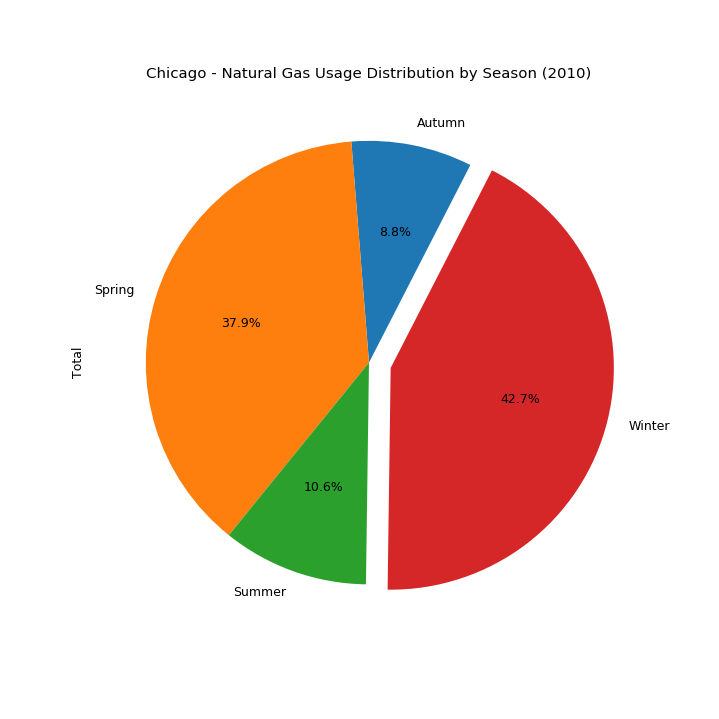

In [13]:
# Plotting pie chart
labels=['Autumn','Spring','Summer','Winter']

# To show usage is highest in winter
explode = (0, 0, 0, 0.1)

plt.figure(figsize=(8,8))
# plot chart
ax1 = plt.subplot()
seasonal_usage.plot(kind='pie', ax=ax1, explode=explode, autopct='%1.1f%%',
                    startangle=63, shadow=False, labels=labels, legend=False, fontsize=10)
plt.title("Chicago - Natural Gas Usage Distribution by Season (2010)")
plt.tight_layout
plt.savefig("Seasonal Usage.png")

plt.show()